# Assignment 2: Canny Edge Detection

The Canny edge detection algorithm is commonly used to identify the outlines of objects in a picture. In this assignment you are step by step building up this algorithm. 

If one step in the process does not work at all you can always continue with the picture that resulted from the previous sub-task. 

2a) Use the test picture provided in brightspace or any other picture that you can upload and convert it to a greyscale picutre. Show the resulting picture using the imshow() command. 

In [215]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import scipy.ndimage as ndim
from scipy.ndimage import gaussian_filter

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


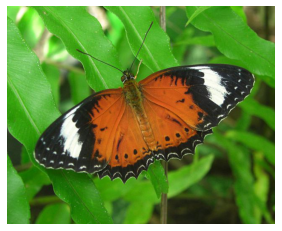

In [216]:
#Mount a file from drive with defined directory.
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/BSP/Tutorial_3")
f_name = "Butterfly_farm_1.jpg"

#Plot original image file 
image = img.imread(f_name)
imgplot = plt.imshow(image)
plt.axis('off')
plt.show()

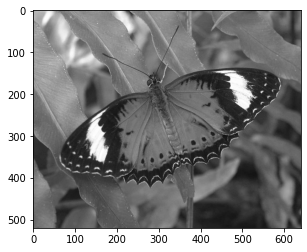

In [217]:
#convert 3rd value of image array to Grayscale with value of define R, G, and B
R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
imgGray = 0.299 * R + 0.587 * G + 0.114 * B
plt.imshow(imgGray, cmap='gray')
plt.show()

#Source: https://www.dynamsoft.com/blog/insights/image-processing/image-processing-101-color-space-conversion/

2b) Apply a convolutional filter with a gaussian kernel (sigma=1) to the image and plot it again. Hint: you will need to import ndimage from the scipy package.  

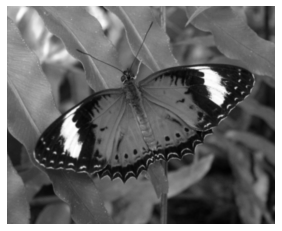

In [218]:
#Apply a gaussian filter with Sigma==1 with ndimage
sigma = 1.0
gs_img_gf = ndim.gaussian_filter(imgGray, sigma)
plt.imshow(gs_img_gf, cmap='gray')
plt.axis('off')
plt.show()

2c) Use the Sobel filter to identify the edges. Hint: to avoid that the lines of the edges become to think apply it ones in x and ones in y direction.

In [219]:
#Appy Sobel filter on each of x and y direction of image with Gaussian filter applied Axis==1 --> Hor (X), Axis==0 --> Ver (Y)
gs_img_sb_x = ndim.sobel(imgGray,axis=1)
gs_img_sb_y = ndim.sobel(imgGray,axis=0)

2d) Calculate the mgnitude each of the pixels and an image that consits of magnitude pixels. Hint: M=sqrt(I_x^2 + I_y^2).

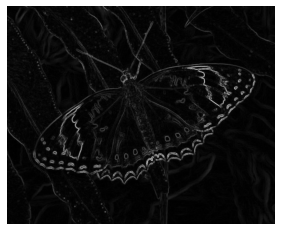

In [220]:
#Find Magnitude then plot image w/ magnitude pixels
gs_img_sb = np.hypot(gs_img_sb_x, gs_img_sb_y) #Magnitude using np.hypot 
plt.imshow(gs_img_sb, cmap='gray') #Plotting the image
plt.axis('off')
plt.show()

2e) Calculate the direction of the gradient. Hint: theta=arctan(I_y/I_x).

In [221]:
theta = np.arctan2(gs_img_sb_y, gs_img_sb_x) #Gradient 
angle = np.rad2deg(theta) #atan outputs radian, need to convert to deg 

2f) Some of the lines in the magnitude picture are quite thick. To reduce the line thickness you need to apply maximum supression. For this you need to carry out the following steps:

a) Loop through all the pixels in the magnitude matrix

b) For each pixel get the direction from the theta matrix

c) Imagine a line that crosses the pixel with an angle theta. Look whether the two neighboring pixels that the theta line crosses are bigger than your current pixel.

d) If yes set current pixel to 0

When you did that for all pixels plot the resulting image.

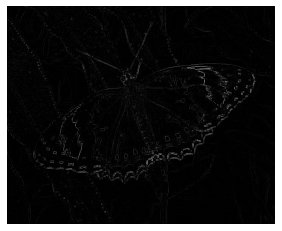

In [227]:
hor, ver = gs_img_sb.shape #Take the length of each array used for looping
gs_img_sb_ms = np.zeros((hor,ver)) #Dummy Var of zeroes to be used for Max Supress output
angle[angle < 0] += 180
#loop on each hor-ver pixels
for i in range(1,hor-1):
  for j in range(1,ver-1):
                
      #0 Deg (grad horizontal direction)
      if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180) or (337.5 <= angle[i,j] <= 360):
        q = gs_img_sb[i, j+1]
        r = gs_img_sb[i, j-1]
      #45 Deg (grad diagonal 1 & 3 quadrant direction)
      elif (22.5 <= angle[i,j] < 67.5) or (202.5 <= angle[i,j] < 247.5):
        q = gs_img_sb[i+1, j-1]
        r = gs_img_sb[i-1, j+1]
      #90 Deg (grad diagonal 2 & 4 quadrant direction)
      elif (67.5 <= angle[i,j] < 112.5) or (247.5 <= angle[i,j] < 292.5): 
        q = gs_img_sb[i+1, j]
        r = gs_img_sb[i-1, j]
      #135 Deg (grad vertical direction)
      elif (112.5 <= angle[i,j] < 157.5) or (292.5 <= angle[i,j] < 337.5):
        q = gs_img_sb[i-1, j-1]
        r = gs_img_sb[i+1, j+1]

      if (gs_img_sb[i,j] >= q) and (gs_img_sb[i,j] >= r):
        gs_img_sb_ms[i,j] = gs_img_sb[i,j]        
      else:
        gs_img_sb_ms[i,j] = 0

plt.imshow(gs_img_sb_ms, cmap='gray')
plt.axis('off')
plt.show()

2g) Apply thresholding to the edges. That means you sort them into 3 categories no edge=0, weak edge =50, and strong edge =255. To do so you need to define two thresholds. The higher threshold should be at 15% of the maximum value of the image resulting from the maximum supression. The lower threshold should be 7% of the higher threshold.

Find all pixels that are below both thresholds and set them to 0. The ones in between the thresholds should become 50 and the ones above the high threshold should become 255. Plot the resulting image.

Hint: In python you can get the indices using numpy.where

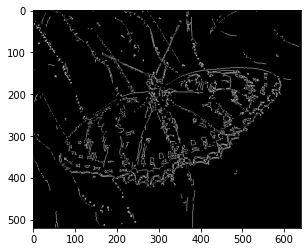

In [228]:
#Define edge parameter treshold
tres_h = gs_img_sb_ms.max() * 0.15;
tres_l = tres_h * 0.07;
weak = 50
strong = 255
    
hor, ver = gs_img_sb_ms.shape
gs_img_sb_tr = np.zeros((hor,ver))

#Find pixel below, between, and above the treshold 
zeros_i, zeros_j = np.where(gs_img_sb_ms < tres_l)
weak_i, weak_j = np.where((gs_img_sb_ms <= tres_h) & (gs_img_sb_ms >= tres_l))    
strong_i, strong_j = np.where(gs_img_sb_ms >= tres_h)

gs_img_sb_tr[strong_i, strong_j] = strong
gs_img_sb_tr[weak_i, weak_j] = weak

hor, ver = gs_img_sb_tr.shape
#look for strong pixel, if pixel is weak and there's a strong pixel around it, then save that pixel as strong pixel
for i in range(1, hor-1):
  for j in range(1, ver-1):
    if (gs_img_sb_tr[i,j] == weak):
      if ((gs_img_sb_tr[i+1, j-1] == strong) or (gs_img_sb_tr[i+1, j] == strong) or (gs_img_sb_tr[i+1, j+1] == strong)
        or (gs_img_sb_tr[i, j-1] == strong) or (gs_img_sb_tr[i, j+1] == strong)
        or (gs_img_sb_tr[i-1, j-1] == strong) or (gs_img_sb_tr[i-1, j] == strong) or (gs_img_sb_tr[i-1, j+1] == strong)):
        gs_img_sb_tr[i, j] = strong
      else:
        gs_img_sb_tr[i, j] = 0
plt.imshow(gs_img_sb_tr, cmap='gray')

2i) Compare your result to the one you can obtain on your picture with the code below. Is your picture similar? If not which step caused the problem?

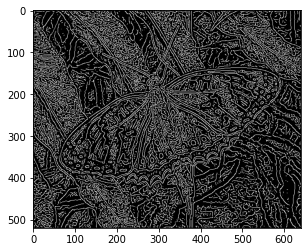

In [233]:
from skimage import feature
edges1 = feature.canny(gs_img_gf,sigma=1.0) #exchange data with the name you gave your picture to see the result of this code
plt.imshow(edges1, cmap='gray')

###feature.canny inputs are grayscale image

#Comment
The result using feature.canny and making from scratch is not the same. This can be caused in the step of applying maximum suppression and treshold, since **"feature.canny"** function has a gaussian filter function in it. The main thing that may cause this difference is in the maximum suppression step, i think this way because most of the literature i read refers to **"non maximum suppression"** instead of "maximum suppression" even thought then definition stated in 2f stated the same as the literature i read. Maybe it's my code that's not right.

The main difference is see between the two images is the noise that appeared in the "feature.canny" and some of edges that doesnt show up in the Canny Edge Detection that i made. This noise problem **can be fixed by changing the sigma** on gaussian filter parameter.  
